# import data and libs

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv("gdrive/MyDrive/dataset/heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# graphs

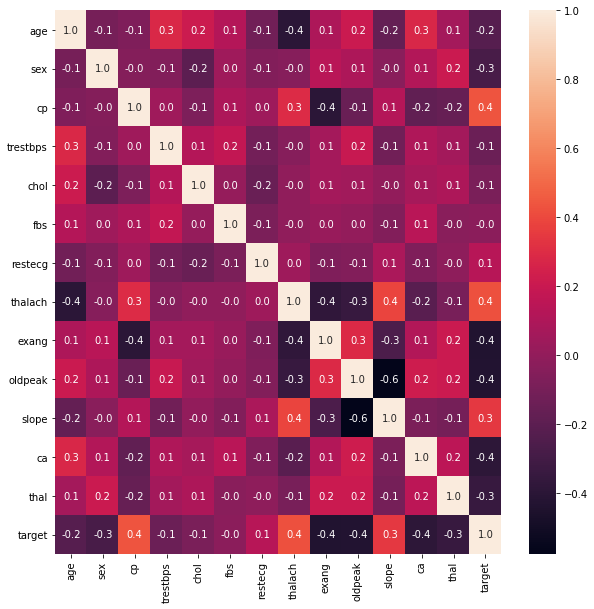

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

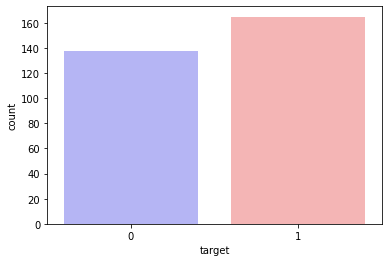

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


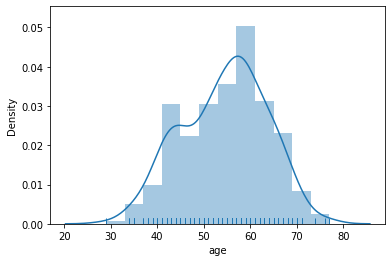

In [ ]:
sns.distplot(df['age'],rug=True)
plt.show()

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

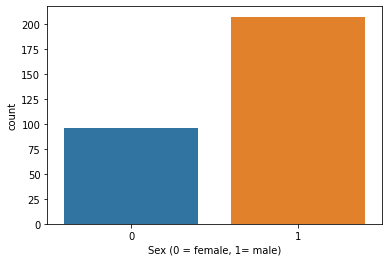

In [ ]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

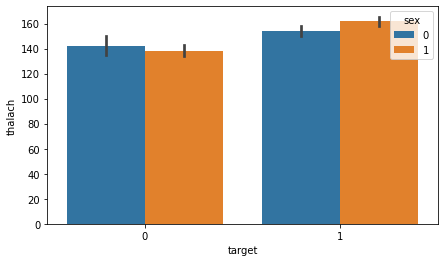

In [ ]:
plt.figure(num=None, figsize=(7, 4))

sns.barplot(y='thalach', x='target',hue='sex', data=df)
plt.show()

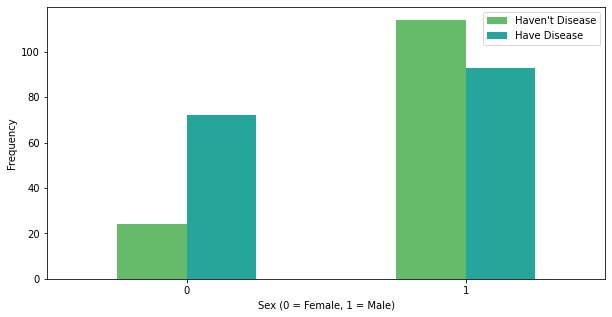

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

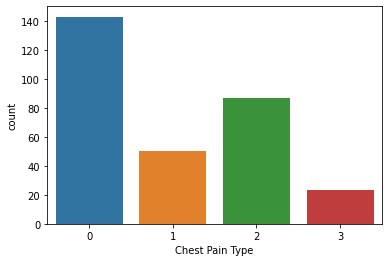

In [ ]:
sns.countplot(x='cp', data=df)
plt.xlabel('Chest Pain Type')
plt.show()

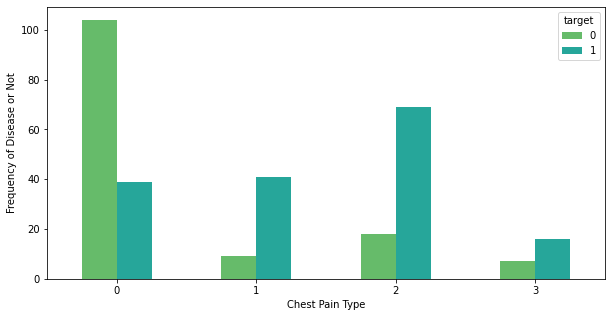

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

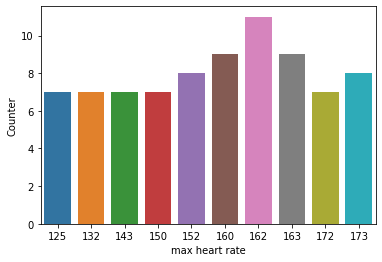

In [ ]:
sns.barplot(x=df.thalach.value_counts()[:10].index,y=df.thalach.value_counts()[:10].values)
plt.xlabel('max heart rate')
plt.ylabel('Counter')
plt.show()

# split

In [ ]:
chestPain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chestPain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
frames=[df,sp,th]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal'],axis=1,inplace=True)

In [ ]:
df.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# models

In [ ]:
#LogisticRegression
logiReg=LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
logiReg.fit(X_train,y_train)
logiRegPred=logiReg.predict(X_test)
logiRegAcu=accuracy_score(y_test, logiRegPred)

#SVM classifier
svc=SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(X_train,y_train)
svcPred=svc.predict(X_test)
svcAcu=accuracy_score(y_test, svcPred)

#Bayes
bayes=GaussianNB()
bayes.fit(X_train,y_train)
bayesPred=bayes.predict(X_test)
bayesAcu=accuracy_score(bayesPred,y_test)

#RandomForest
randomForest=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
randomForest.fit(X_train,y_train)
randomForestPred=randomForest.predict(X_test)
randomForestAcu=accuracy_score(randomForestPred,y_test)

# DecisionTree Classifier
dTree=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dTree.fit(X_train,y_train)
dTreePred=dTree.predict(X_test)
dTreeAcu=accuracy_score(dTreePred,y_test)

#KNN
knn=KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='uniform')
knn.fit(X_train,y_train)
knnPred=knn.predict(X_test)
knnAcu=accuracy_score(knnPred,y_test)

#XGB
xgboost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=0)
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)
xgboost_accu = accuracy_score(y_test, xgboost_pred)


# matrix score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
lr_conf_matrix = confusion_matrix(y_test, logiRegPred)
svc_conf_matrix = confusion_matrix(y_test, svcPred)
knn_conf_matrix = confusion_matrix(y_test, knnPred)
dTree_conf_matrix = confusion_matrix(y_test, dTreePred)
randomForest_conf_matrix = confusion_matrix(y_test, randomForestPred)
bayes_conf_matrix = confusion_matrix(y_test, bayesPred)
xgboost_conf_matrix = confusion_matrix(y_test, xgboost_pred)


In [ ]:
print(f'Logistic Regression\n{lr_conf_matrix}')
print(f'SVC\n{svc_conf_matrix}')
print(f'KNN\n{knn_conf_matrix}')
print(f'Decision Tree\n{dTree_conf_matrix}')
print(f'Random Forest\n{randomForest_conf_matrix}')
print(f'Bayes\n{bayes_conf_matrix}')
print(f'XGBoost\n{xgboost_conf_matrix}')

Logistic Regression
[[26  6]
 [ 1 28]]
SVC
[[26  6]
 [ 1 28]]
KNN
[[28  4]
 [ 2 27]]
Decision Tree
[[28  4]
 [ 2 27]]
Random Forest
[[26  6]
 [ 0 29]]
Bayes
[[28  4]
 [ 2 27]]
XGBoost
[[27  5]
 [ 0 29]]


# accuracy, specification, sensitivity, precision AUC, f1 score, and ROC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from inspect import signature

# XGBoost

In [ ]:
probs = xgboost.predict_proba(X_test)

In [ ]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

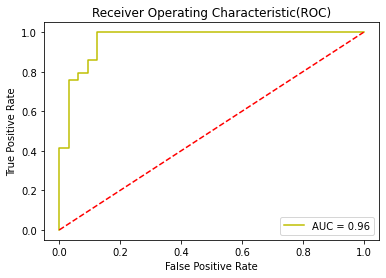

In [ ]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = xgboost.predict(X_test)

In [ ]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))


recall score:  1.0
precision score:  0.8529411764705882
f1 score:  0.9206349206349206
accuracy:  0.9180327868852459


In [ ]:
total = sum(sum(xgboost_conf_matrix))
accuracy=(xgboost_conf_matrix[0,0]+xgboost_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = xgboost_conf_matrix[0,0]/(xgboost_conf_matrix[0,0]+xgboost_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = xgboost_conf_matrix[1,1]/(xgboost_conf_matrix[1,0]+xgboost_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9180327868852459
Sensitivity :  0.84375
Specificity :  1.0


# LR

In [ ]:
probs = logiReg.predict_proba(X_test)

In [ ]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

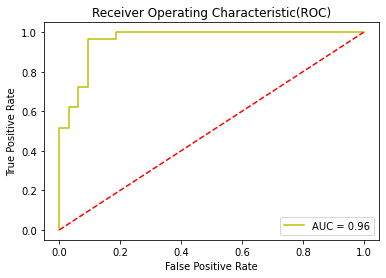

In [ ]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = logiReg.predict(X_test)

In [ ]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))


recall score:  0.9655172413793104
precision score:  0.8235294117647058
f1 score:  0.888888888888889
accuracy:  0.8852459016393442


In [ ]:
total = sum(sum(lr_conf_matrix))
accuracy=(lr_conf_matrix[0,0]+lr_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = lr_conf_matrix[0,0]/(lr_conf_matrix[0,0]+lr_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = lr_conf_matrix[1,1]/(lr_conf_matrix[1,0]+lr_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8852459016393442
Sensitivity :  0.8125
Specificity :  0.9655172413793104


# svm classifier

In [ ]:
probs = svc.predict_proba(X_test)

In [ ]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

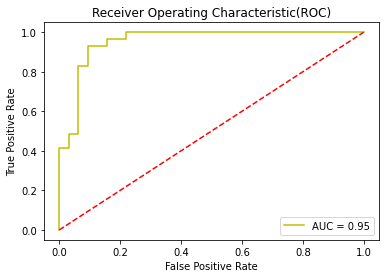

In [ ]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.9655172413793104
precision score:  0.8235294117647058
f1 score:  0.888888888888889
accuracy:  0.8852459016393442


In [ ]:
total = sum(sum(svc_conf_matrix))
accuracy=(svc_conf_matrix[0,0]+svc_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = svc_conf_matrix[0,0]/(svc_conf_matrix[0,0]+svc_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = svc_conf_matrix[1,1]/(svc_conf_matrix[1,0]+svc_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8852459016393442
Sensitivity :  0.8125
Specificity :  0.9655172413793104


# bayes

In [ ]:
probs = bayes.predict_proba(X_test)

In [ ]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

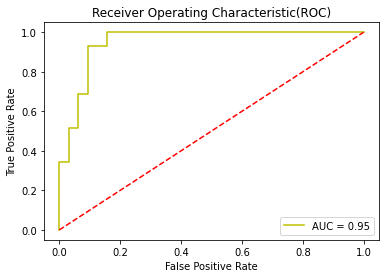

In [ ]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = bayes.predict(X_test)

In [ ]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.9310344827586207
precision score:  0.8709677419354839
f1 score:  0.9
accuracy:  0.9016393442622951


In [ ]:
total = sum(sum(bayes_conf_matrix))
accuracy=(bayes_conf_matrix[0,0]+bayes_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = bayes_conf_matrix[0,0]/(bayes_conf_matrix[0,0]+bayes_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = bayes_conf_matrix[1,1]/(bayes_conf_matrix[1,0]+bayes_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9016393442622951
Sensitivity :  0.875
Specificity :  0.9310344827586207


# RF

In [ ]:
probs = randomForest.predict_proba(X_test)

In [ ]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

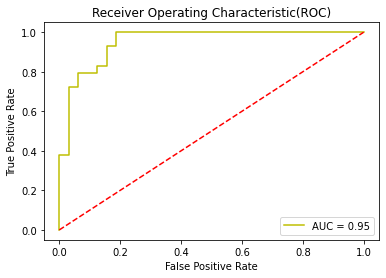

In [ ]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = randomForest.predict(X_test)

In [ ]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  1.0
precision score:  0.8285714285714286
f1 score:  0.90625
accuracy:  0.9016393442622951


In [ ]:
total = sum(sum(randomForest_conf_matrix))
accuracy=(randomForest_conf_matrix[0,0]+randomForest_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = randomForest_conf_matrix[0,0]/(randomForest_conf_matrix[0,0]+randomForest_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = randomForest_conf_matrix[1,1]/(randomForest_conf_matrix[1,0]+randomForest_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9016393442622951
Sensitivity :  0.8125
Specificity :  1.0


# dt

In [ ]:
probs = dTree.predict_proba(X_test)

In [ ]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

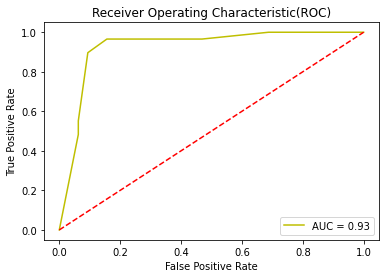

In [ ]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = dTree.predict(X_test)

In [ ]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.9310344827586207
precision score:  0.8709677419354839
f1 score:  0.9
accuracy:  0.9016393442622951


In [ ]:
total = sum(sum(dTree_conf_matrix))
accuracy=(dTree_conf_matrix[0,0]+dTree_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = dTree_conf_matrix[0,0]/(dTree_conf_matrix[0,0]+dTree_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = dTree_conf_matrix[1,1]/(dTree_conf_matrix[1,0]+dTree_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9016393442622951
Sensitivity :  0.875
Specificity :  0.9310344827586207


# knn

In [ ]:
probs = knn.predict_proba(X_test)

In [ ]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

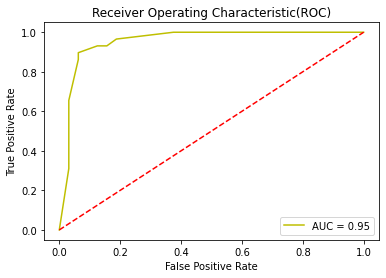

In [ ]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.9310344827586207
precision score:  0.8709677419354839
f1 score:  0.9
accuracy:  0.9016393442622951


In [ ]:
total = sum(sum(knn_conf_matrix))
accuracy=(knn_conf_matrix[0,0]+knn_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = knn_conf_matrix[0,0]/(knn_conf_matrix[0,0]+knn_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = knn_conf_matrix[1,1]/(knn_conf_matrix[1,0]+knn_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.9016393442622951
Sensitivity :  0.875
Specificity :  0.9310344827586207


# accuracy graph

In [ ]:
print('LogisticRegression Accuracy:\t',logiRegAcu)
print('RandomForest Accuracy:\t\t',randomForestAcu)
print('DecisionTree Accuracy:\t\t',dTreeAcu)
print('KNN Accuracy:\t\t\t',knnAcu)
print('SVM Classifier Accuracy:\t',svcAcu)
print('Bayes Accuracy:\t\t\t',bayesAcu)
print('xgboost Accuracy:\t\t', xgboost_accu)

LogisticRegression Accuracy:	 0.8852459016393442
RandomForest Accuracy:		 0.9016393442622951
DecisionTree Accuracy:		 0.9016393442622951
KNN Accuracy:			 0.9016393442622951
SVM Classifier Accuracy:	 0.8852459016393442
Bayes Accuracy:			 0.9016393442622951
xgboost Accuracy:		 0.9180327868852459


Text(0.5, 1.0, 'Model Accracy')

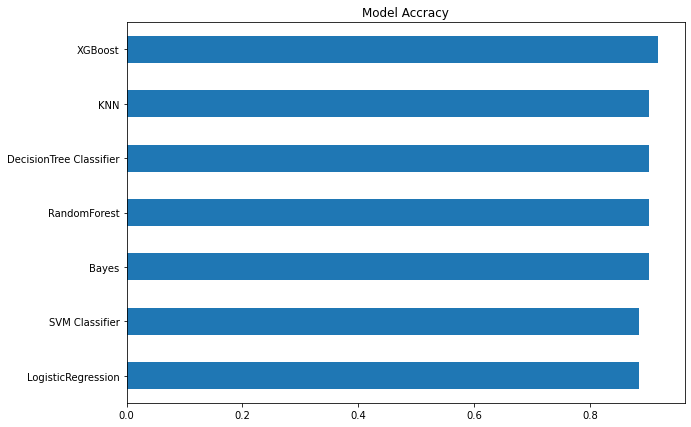

In [ ]:
modelAccuracy = pd.Series(data=[logiRegAcu,svcAcu,bayesAcu,randomForestAcu,dTreeAcu,knnAcu,xgboost_accu], 
index=['LogisticRegression','SVM Classifier','Bayes',
'RandomForest','DecisionTree Classifier','KNN','XGBoost'])
fig= plt.figure(figsize=(10,7))
modelAccuracy.sort_values().plot.barh()
plt.title('Model Accracy')